In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mental Health Dataset.csv')

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


**Cleaning Process**


In [5]:
df = df.rename(columns={'Timestamp':'timestamp', 'Gender':'gender', 'Country':'country', 'Occupation':'occupation', 'Days_Indoors':'days_indoors', 'Growing_Stress':'growing_stress',
                        'Changes_Habits':'changes_habits', 'Mental_Health_History':'mh_history', 'Mood_Swings':'mood_swings', 'Coping_Struggles':'coping_struggles',
                        'Work_Interest':'work_interest', 'Social_Weakness':'social_weakness' })


In [6]:
df.isnull().sum()

,0
timestamp,0
gender,0
country,0
occupation,0
self_employed,5202
family_history,0
treatment,0
days_indoors,0
growing_stress,0
changes_habits,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   timestamp                292364 non-null  object
 1   gender                   292364 non-null  object
 2   country                  292364 non-null  object
 3   occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   days_indoors             292364 non-null  object
 8   growing_stress           292364 non-null  object
 9   changes_habits           292364 non-null  object
 10  mh_history               292364 non-null  object
 11  mood_swings              292364 non-null  object
 12  coping_struggles         292364 non-null  object
 13  work_interest            292364 non-null  object
 14  social_weakness     

In [8]:
df.select_dtypes('object').describe()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [9]:
df.shape

(292364, 17)

In [11]:
df.timestamp = pd.to_datetime(df.timestamp)
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   timestamp                292364 non-null  datetime64[ns]
 1   gender                   292364 non-null  object        
 2   country                  292364 non-null  object        
 3   occupation               292364 non-null  object        
 4   self_employed            287162 non-null  object        
 5   family_history           292364 non-null  object        
 6   treatment                292364 non-null  object        
 7   days_indoors             292364 non-null  object        
 8   growing_stress           292364 non-null  object        
 9   changes_habits           292364 non-null  object        
 10  mh_history               292364 non-null  object        
 11  mood_swings              292364 non-null  object        
 12  coping_struggles

In [15]:
np.unique(df['year'])

array([2014, 2015, 2016], dtype=int32)

In [16]:
np.unique(df['month'])

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

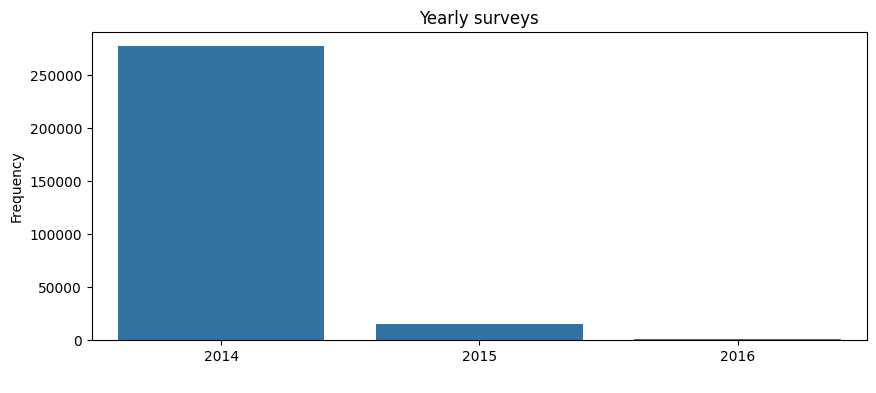

In [17]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'year', data = df)
plt.title('Yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

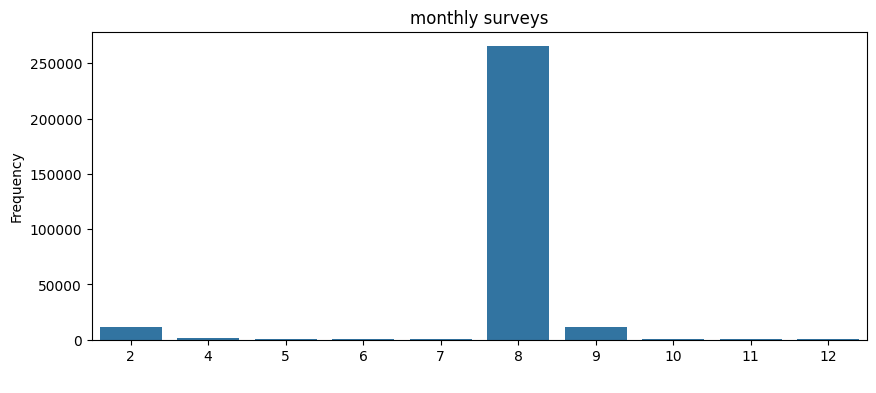

In [18]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'month', data = df)
plt.title('monthly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

**Factors that influence menthal health period**
**Employment,sex,family,Living circumstances**



**EMPLOYMENT**

In [19]:
print(np.unique(df['occupation']))

['Business' 'Corporate' 'Housewife' 'Others' 'Student']


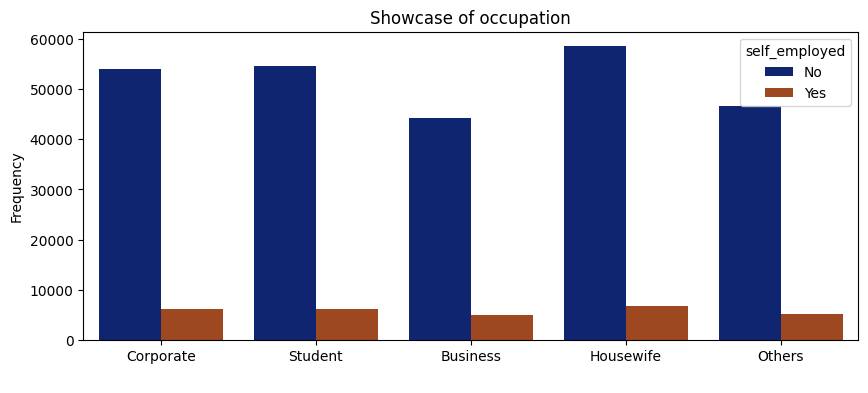

In [30]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'occupation',data = df, palette = 'dark', hue = 'self_employed')
plt.title('Showcase of occupation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [27]:
np.unique(df['work_interest'])

array(['Maybe', 'No', 'Yes'], dtype=object)

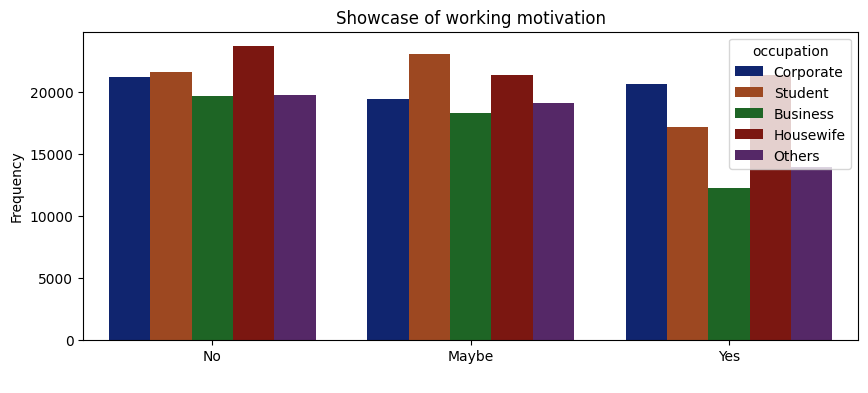

In [29]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'work_interest',data = df,palette = 'dark',hue = 'occupation')
plt.title('Showcase of working motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [31]:
np.unique(df['growing_stress'])

array(['Maybe', 'No', 'Yes'], dtype=object)

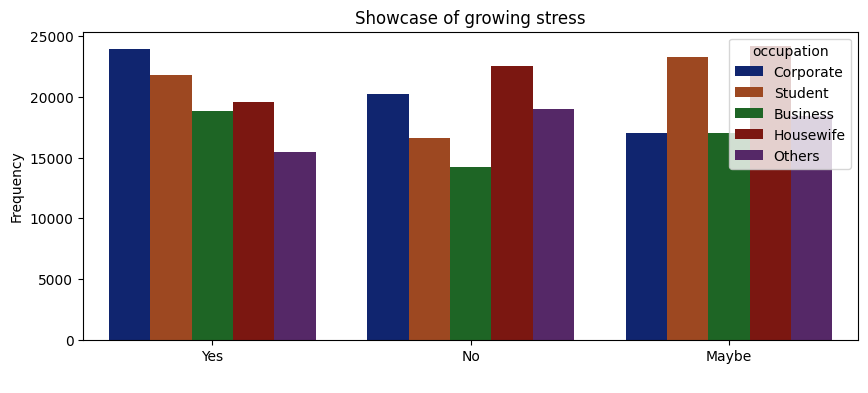

In [34]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'growing_stress',data = df, palette = 'dark',hue = 'occupation')
plt.title('Showcase of growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

**SEX**

<ipython-input-35-8f1739cb6388>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'gender', data =df, palette = 'pastel')


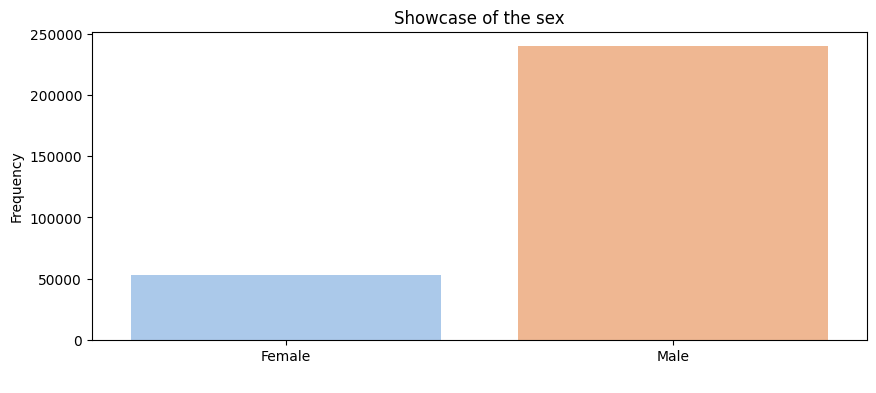

In [35]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'gender', data =df, palette = 'pastel')
plt.title('Showcase of the sex')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

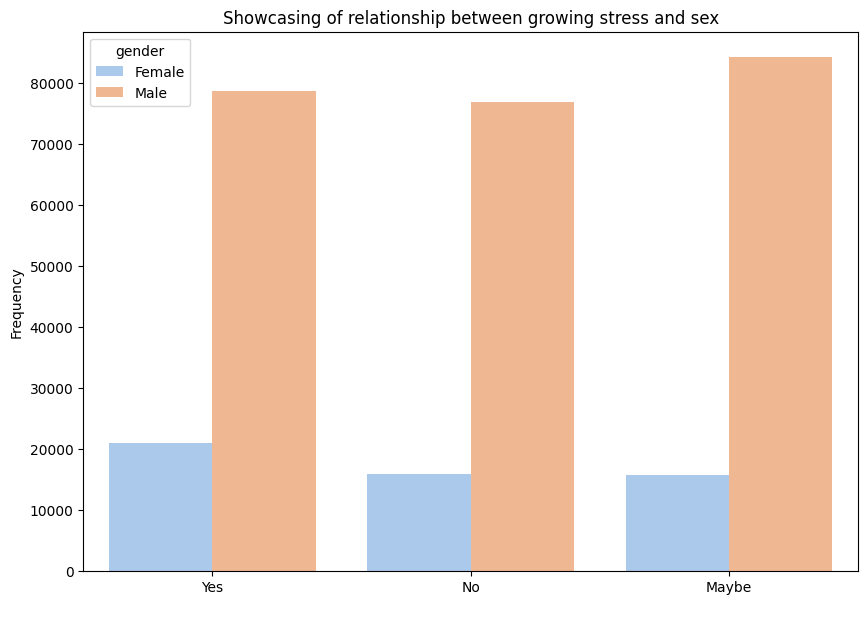

In [39]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'growing_stress',data = df,hue = 'gender', palette = 'pastel')
plt.title('Showcasing of relationship between growing stress and sex')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

**FAMILY**

<ipython-input-40-55e7115e7480>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'family_history',data = df,palette = 'deep')


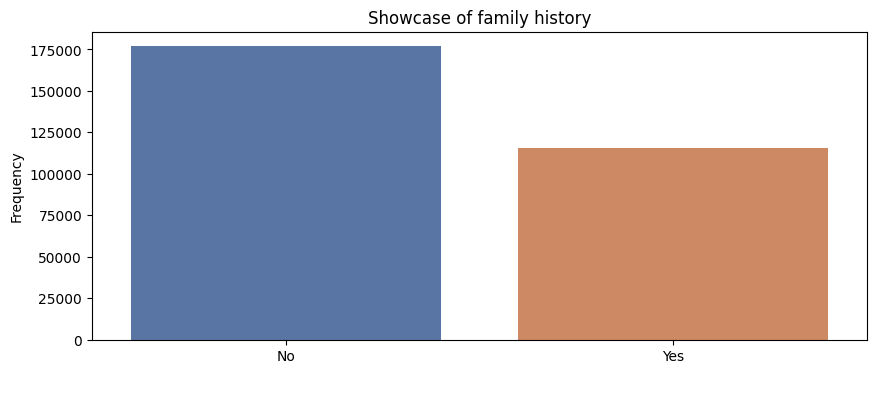

In [40]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'family_history',data = df,palette = 'deep')
plt.title('Showcase of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

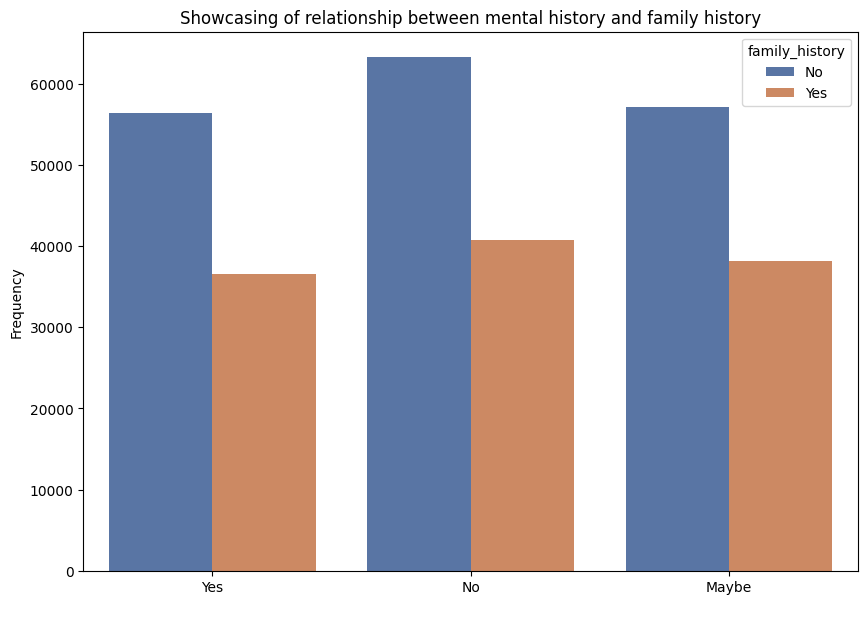

In [41]:
plt.figure(figsize = (10,7))
# mh_story === mental history
sns.countplot(x = 'mh_history',data = df,palette = 'deep',hue = 'family_history')
plt.title('Showcasing of relationship between mental history and family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

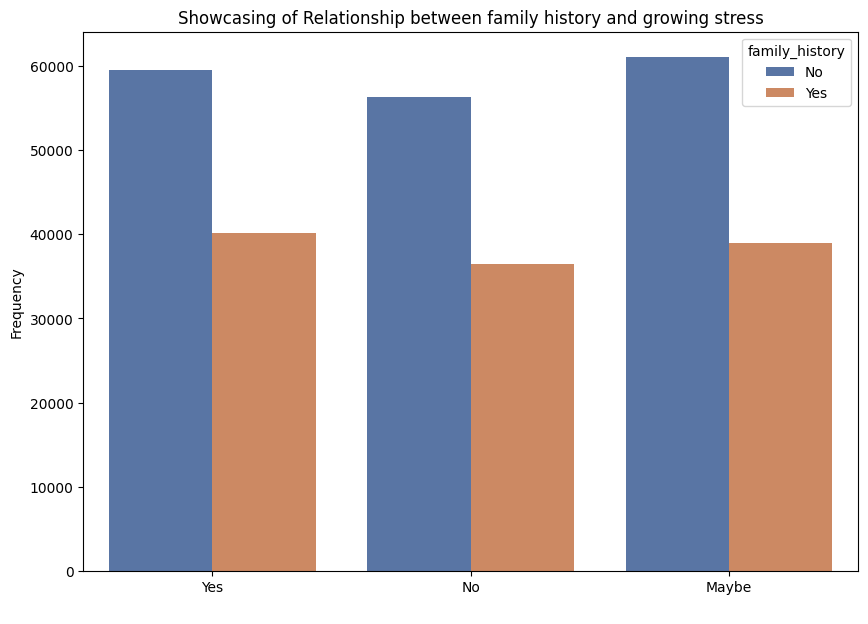

In [46]:
plt.figure(figsize = (10,7))
sns.countplot(x='growing_stress', data = df,palette = 'deep',hue = 'family_history')
plt.title('Showcasing of Relationship between family history and growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

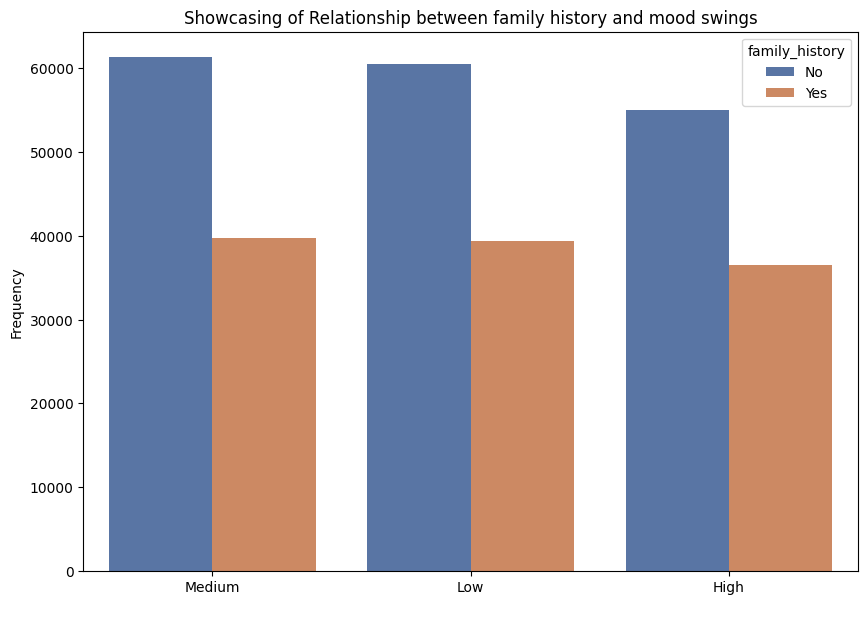

In [47]:
plt.figure(figsize = (10,7))
sns.countplot(x='mood_swings', data = df,palette = 'deep',hue = 'family_history')
plt.title('Showcasing of Relationship between family history and mood swings')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

**Living Circumstances**

Text(0.5, 0, ' ')

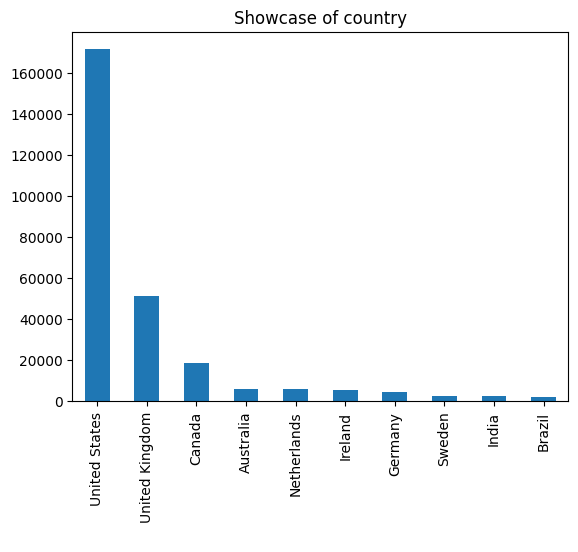

In [51]:
country_count = df.groupby(['country']).agg(total_count = ('treatment','count')).sort_values('total_count',ascending=False)
t10 = country_count.head(10)
t10.plot(kind = 'bar',legend = False)
plt.title('Showcase of country')
plt.xlabel(' ')


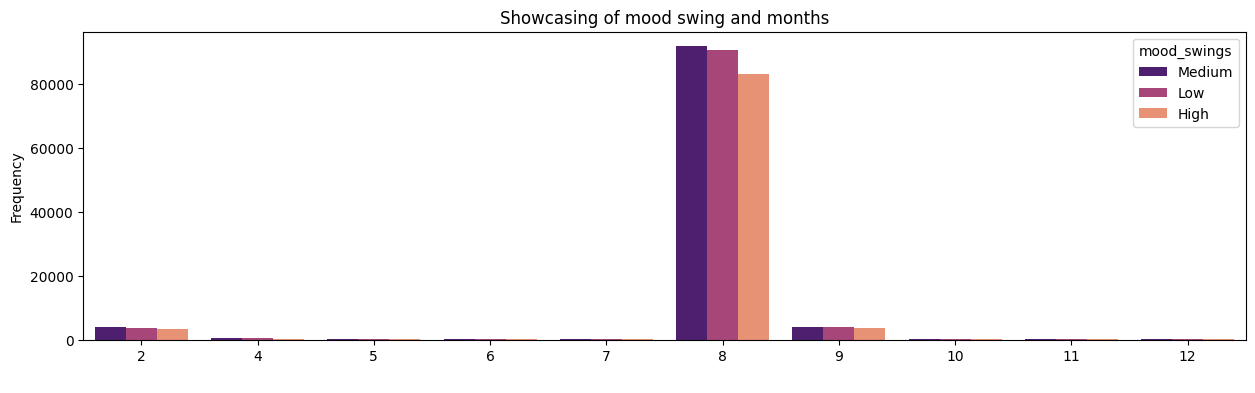

In [54]:
plt.figure(figsize=(15, 4))
sns.countplot(x='month', data=df, hue='mood_swings',  palette = 'magma')
plt.title('Showcasing of mood swing and months')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

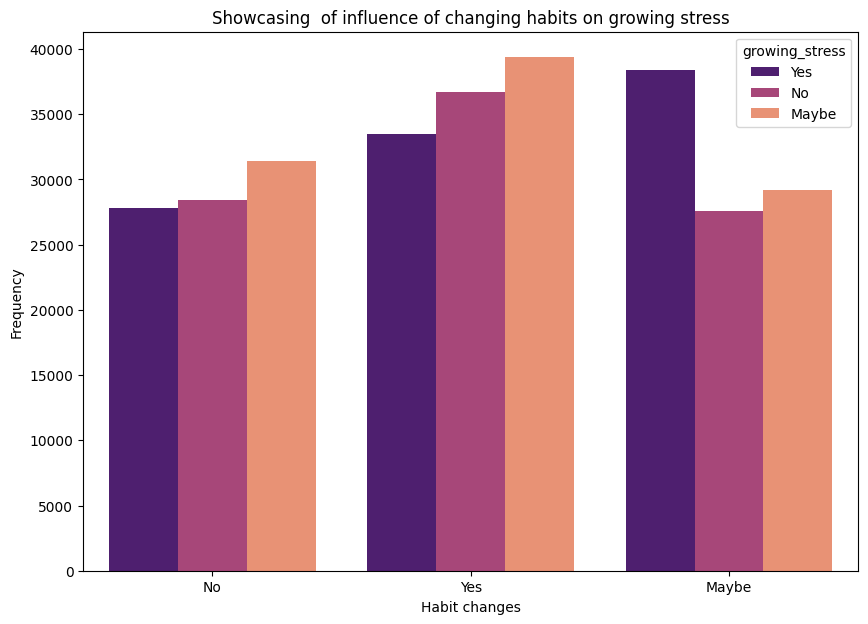

In [55]:
plt.figure(figsize=(10, 7))
sns.countplot(x='changes_habits', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Showcasing  of influence of changing habits on growing stress')
plt.xlabel('Habit changes')
plt.ylabel('Frequency')
plt.show()

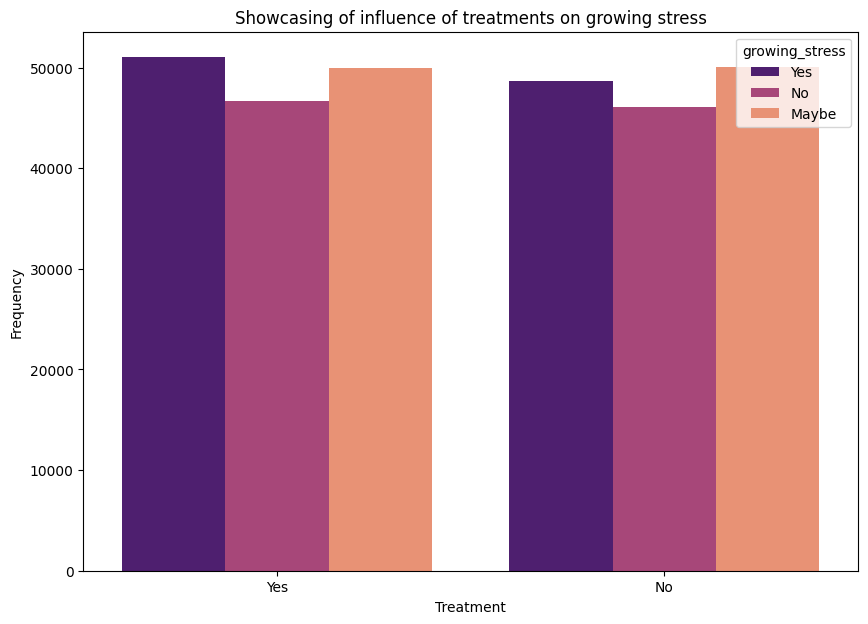

In [56]:
plt.figure(figsize=(10, 7))
sns.countplot(x='treatment', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Showcasing of influence of treatments on growing stress')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.show()

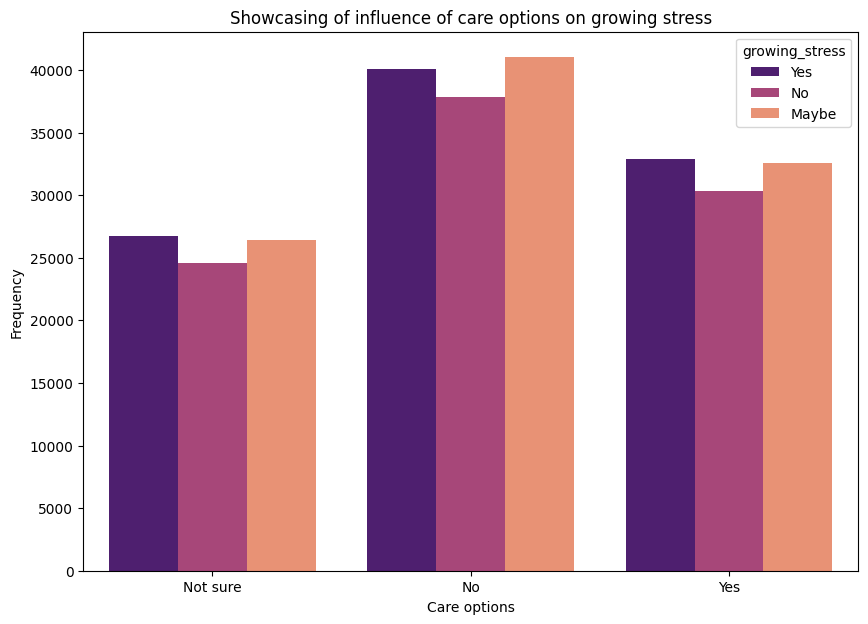

In [57]:
plt.figure(figsize=(10, 7))
sns.countplot(x='care_options', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Showcasing of influence of care options on growing stress')
plt.xlabel('Care options')
plt.ylabel('Frequency')
plt.show()

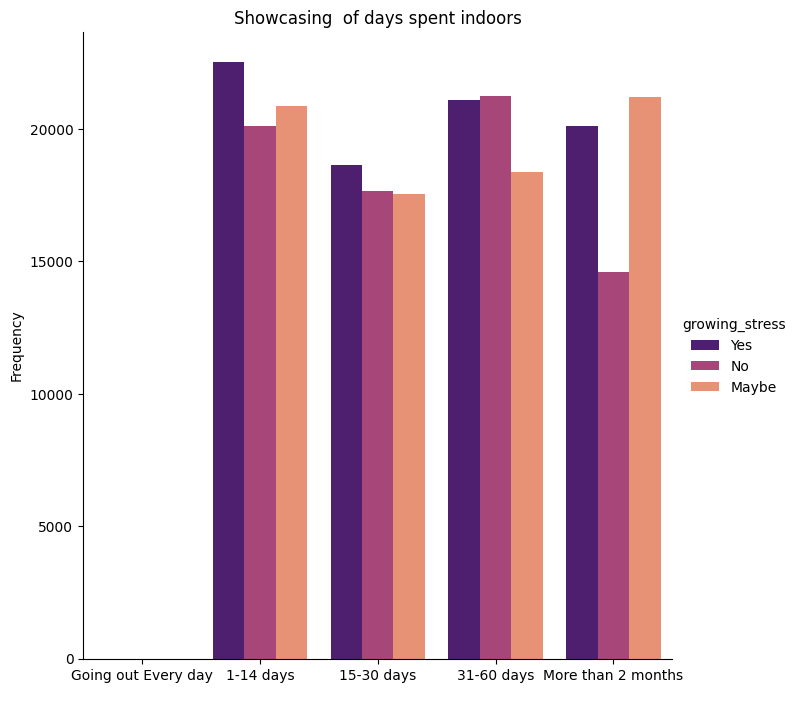

In [58]:
category_order=['Going out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']
sns.catplot(x='days_indoors', data=df, kind= 'count', palette = 'magma', hue='growing_stress', \
            order=category_order, height=7)
plt.title('Showcasing  of days spent indoors')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()